# KNN

In [78]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

## Data

In [79]:
# Chargement du dataset Iris
iris = load_iris()
X = iris.data  # Caractéristiques des fleurs
y = iris.target  # Classes des fleurs
feature_names = iris.feature_names

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Visualisation

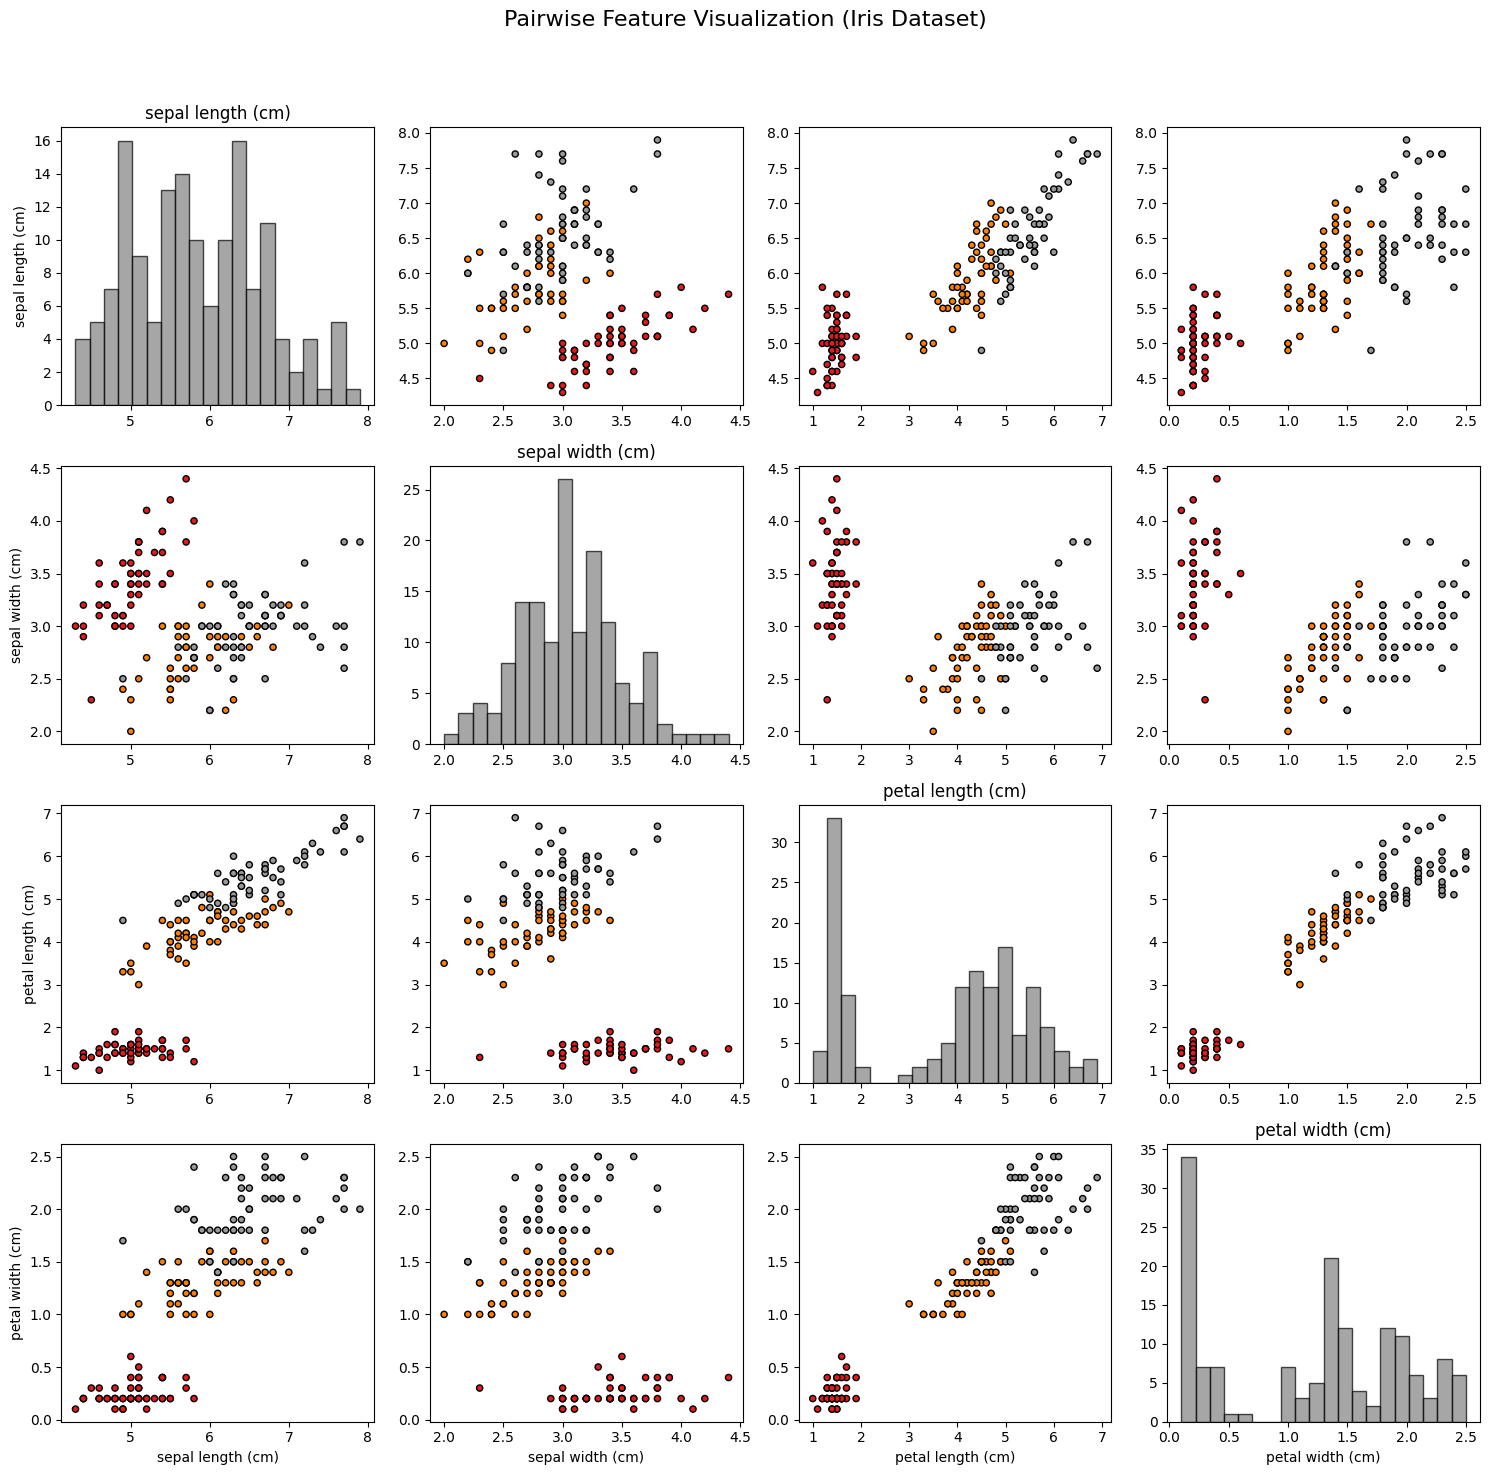

In [80]:
# Number of features
n_features = X.shape[1]

# Create a grid of subplots for all feature combinations
fig, axes = plt.subplots(n_features, n_features, figsize=(15, 15))
fig.suptitle("Pairwise Feature Visualization (Iris Dataset)", fontsize=16)

# Plot each pair of features
for i in range(n_features):
    for j in range(n_features):
        ax = axes[i, j]
        if i == j:
            # Diagonal: Histogram of a single feature
            ax.hist(X[:, i], bins=20, color='gray', edgecolor='black', alpha=0.7)
            ax.set_title(f"{feature_names[i]}")
        else:
            # Scatter plot for feature pairs
            scatter = ax.scatter(X[:, j], X[:, i], c=y, cmap=plt.cm.Set1, edgecolor='k', s=20)
        if i == n_features - 1:
            ax.set_xlabel(feature_names[j])
        if j == 0:
            ax.set_ylabel(feature_names[i])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Using dimension 3 and 4:

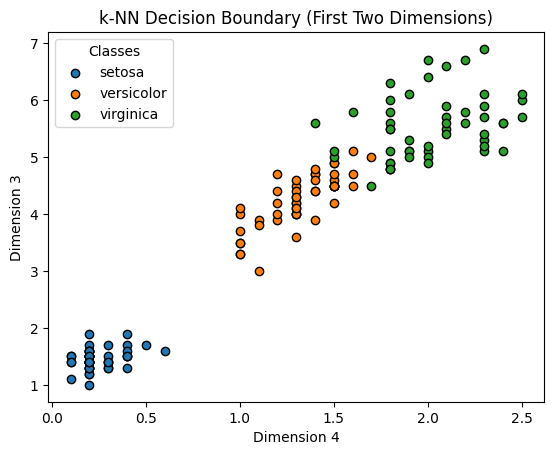

In [81]:
feature_indices=(3, 2)
# Scatter plot for the data points
class_labels = iris.target_names
for class_index, class_label in enumerate(class_labels):
    plt.scatter(
        X[y == class_index, feature_indices[0]],
        X[y == class_index, feature_indices[1]],
        label=class_label,
        edgecolor='k',
    )
plt.xlabel(f"Dimension {feature_indices[0] + 1}")
plt.ylabel(f"Dimension {feature_indices[1] + 1}")
plt.title("k-NN Decision Boundary (First Two Dimensions)")
plt.legend(title="Classes")
plt.show()

## Model

In [82]:
# Modèle k-NN pour la classification (choix de k = 3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Test et validation 

In [83]:
# Prédiction sur les données de test
y_pred = knn_classifier.predict(X_test)

# Affichage des métriques
print(f"Précision du modèle : {accuracy_score(y_test, y_pred):.2f}")
print("Rapport de classification :\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Précision du modèle : 1.00
Rapport de classification :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Example pour une nouvelle donnée

In [ ]:
nouvelle_donnée = np.array([[5.0, 3.5, 1.3, 0.3]])  # Exemple d'entrée
prediction = knn_classifier.predict(nouvelle_donnée)
print(f"Prédiction pour la nouvelle donnée {nouvelle_donnée}: {iris.target_names[prediction[0]]}")

Prédiction pour la nouvelle donnée [[5.  3.5 1.3 0.3]]: setosa


## Visualisation 

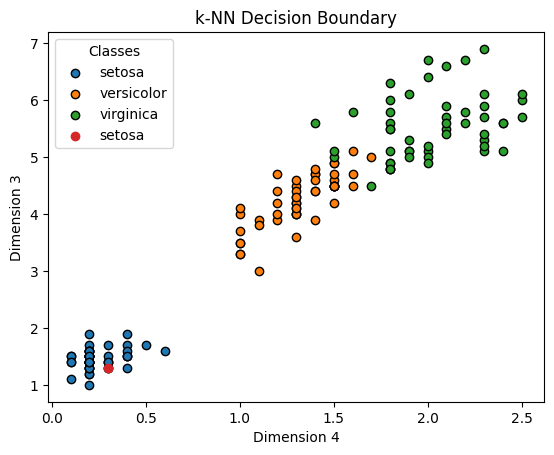

In [85]:
feature_indices=(3, 2)


feature_indices=(3, 2)
# Scatter plot for the data points
class_labels = iris.target_names
for class_index, class_label in enumerate(class_labels):
    plt.scatter(
        X[y == class_index, feature_indices[0]],
        X[y == class_index, feature_indices[1]],
        label=class_label,
        edgecolor='k',
    )

plt.scatter(nouvelle_donnée[0][feature_indices[0]], nouvelle_donnée[0][feature_indices[1]], label=iris.target_names[prediction[0]])
plt.xlabel(f"Dimension {feature_indices[0] + 1}")
plt.ylabel(f"Dimension {feature_indices[1] + 1}")
plt.title("k-NN Decision Boundary")
plt.legend(title="Classes")
plt.show()